# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error unknown url
[nltk_data]     type: https>


False

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error unknown url type:
[nltk_data]     https>


False

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [41]:
import re
from nltk import word_tokenize

In [42]:
def get_sentiment(song):
    scores = dict([('pos', 0), ('neu', 0), ('neg', 0), ('compound', 0)])

    if not song:
        return scores

    raw_text = song
    raw_text = re.sub("\n", ". ", str(raw_text))

    # Using already trained
    sid = SentimentIntensityAnalyzer()
    #sentences = tokenize.sent_tokenize(raw_text)
    sentences = nltk.word_tokenize(raw_text)

    scores = dict([('pos', 0), ('neu', 0), ('neg', 0), ('compound', 0)])
    for sentence in sentences:

        ss = sid.polarity_scores(sentence)

        for k in sorted(ss):
            scores[k] += ss[k]

    return scores 

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [8]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [9]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data['project_is_approved'],test_size = 0.33,stratify=data['project_is_approved'])

print(y_train.value_counts())
print(y_test.value_counts())

1    62113
0    11083
Name: project_is_approved, dtype: int64
1    30593
0     5459
Name: project_is_approved, dtype: int64


In [44]:
sentiment_dict = {}

for i in list(X_train.index):
    sentiment_dict[i] = get_sentiment(X_train["essay"][i])

sentiment_dict_df = pd.DataFrame(sentiment_dict)

In [47]:
sentiment_scores = sentiment_dict_df.T

In [95]:
sentiment_dict_test = {}

for i in list(X_test.index):
    sentiment_dict_test[i] = get_sentiment(X_test["essay"][i])

sentiment_dict_test_df = pd.DataFrame(sentiment_dict_test)

In [97]:
sentiment_dict_test_df.T

,pos,neu,neg,compound
42974,13.0,116.0,0.0,4.9160
9170,22.0,111.0,3.0,5.9797
80849,18.0,89.0,1.0,6.6515
14062,29.0,153.0,8.0,7.7661
19936,20.0,97.0,1.0,6.9421
...,...,...,...,...
47024,15.0,98.0,0.0,5.1555
85994,22.0,95.0,0.0,8.7718
80157,20.0,127.0,3.0,7.6963
106861,25.0,131.0,1.0,8.8704


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [49]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [50]:
#for essay(tfidf)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer_essay_tfidf.fit(X_train['essay'])



# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_essay = vectorizer_essay_tfidf.transform(X_train['essay'])
X_test_tf_essay = vectorizer_essay_tfidf.transform(X_test['essay'])



print("After vectorizations")
print(X_train_tf_essay.shape, y_train.shape)
print(X_test_tf_essay.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
ft1=vectorizer_essay_tfidf.get_feature_names()

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


 Using Pretrained Models: TFIDF weighted W2V

In [51]:
import pickle
with open('glove_vectors', 'rb') as f:
    
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [52]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# compute average word2vec for each review.
from tqdm import tqdm
import numpy as np
def tf_idf_done(word_list):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(word_list): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0])) 
    return tfidf_w2v_vectors

In [54]:
train_tfidf_w2v_vectors=tf_idf_done(X_train['essay'])
test_tfidf_w2v_vectors=tf_idf_done(X_test['essay'])

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [05:00<00:00, 243.72it/s]


73196
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:54<00:00, 313.65it/s]


36052
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [55]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Response coding for Categorical Data

For School state categorical feature

In [56]:
def response_code(X_train, col):

    X_train_1 = X_train[X_train['project_is_approved'] == 1]
    X_train_0 = X_train[X_train['project_is_approved'] == 0]

    true_dict = X_train_1[col].value_counts()
    false_dict = X_train_0[col].value_counts()
    
    both_keys = set(list(true_dict.keys())+list(false_dict.keys()))
    
    if len(list(both_keys-set(true_dict.keys())))>0:
        for temp in list(both_keys-set(true_dict.keys())):
            true_dict[temp] = 0
    if len(list(both_keys-set(false_dict.keys())))>0:
        for temp in list(both_keys-set(false_dict.keys())):
            false_dict[temp] = 0        
    
    col_prob = {}

    for k in both_keys:
        if (k in list(X_train_0.keys())) and (k not in list(X_train_1.keys())) :
            col_prob[k] = [1,0]
        elif (k not in list(X_train_0.keys())) and (k in list(X_train_1.keys())) : 
            col_prob[k] = [0,1]
        else:
            summed = false_dict[k]+true_dict[k]
            col_prob[k] = [round(false_dict[k]/summed,2),round(true_dict[k]/summed,2)]
            
    return col_prob

In [57]:
def response_coding(X_train, X_test, col):
    col_prob = response_code(X_train, col)
    col_0 = str(col)+"_0"
    col_1 = str(col)+"_1"
    
    X_train[col_0] = [0.5]*len(X_train)
    X_train[col_1] = [0.5]*len(X_train)
    
    for k in col_prob.keys():
        X_train.loc[X_train[col] == k, col_0] = col_prob[k][0]
        X_train.loc[X_train[col] == k, col_1] = col_prob[k][1]
        
    X_test[col_0] = [0.5]*len(X_test)
    X_test[col_1] = [0.5]*len(X_test)
    
    for k in col_prob.keys():
        X_test.loc[X_test[col] == k, col_0] = col_prob[k][0]
        X_test.loc[X_test[col] == k, col_1] = col_prob[k][1]
        

    return X_train[col_0].values.reshape(-1,1), X_train[col_1].values.reshape(-1,1), X_test[col_0].values.reshape(-1,1), X_test[col_1].values.reshape(-1,1)

In [58]:
#clean_categories_train_0, clean_categories_train_1, clean_categories_test_0, clean_categories_test_1 = response_coding(X_train.copy(), X_test.copy(), "clean_categories")

school state

In [59]:
school_state_train_0, school_state_train_1, school_state_test_0, school_state_test_1 = response_coding(X_train.copy(), X_test.copy(), "school_state")

teacher prefix

In [60]:
teacher_prefix_train_0, teacher_prefix_train_1, teacher_prefix_test_0, teacher_prefix_test_1 = response_coding(X_train.copy(), X_test.copy(), "teacher_prefix")

project grade category

In [61]:
project_grade_category_train_0, project_grade_category_train_1, project_grade_category_test_0, project_grade_category_test_1 = response_coding(X_train.copy(), X_test.copy(), "project_grade_category")

clean category

In [62]:
clean_categories_train_0, clean_categories_train_1, clean_categories_test_0, clean_categories_test_1 = response_coding(X_train.copy(), X_test.copy(), "clean_categories")

clean subcategory

In [63]:
clean_subcategories_train_0, clean_subcategories_train_1, clean_subcategories_test_0, clean_subcategories_test_1 = response_coding(X_train.copy(), X_test.copy(), "clean_subcategories")

price

In [64]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


previous_year_projects

In [65]:
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

teacher_previous_proj_normalizer = Normalizer()
# normalizer = Normalizer()

teacher_previous_proj_normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
# print(f"Mean : {teacher_previous_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_previous_proj_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_train_teacher_previous_proj_normalized = teacher_previous_proj_normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
x_test_teacher_previous_proj_normalized  = teacher_previous_proj_normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
#x_cv_teacher_previous_proj_normalized    = teacher_previous_proj_normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)

print(x_train_teacher_previous_proj_normalized.shape)
#print(x_cv_teacher_previous_proj_normalized.shape)
print(x_test_teacher_previous_proj_normalized.shape)

(73196, 1)
(36052, 1)


# Prepare for set 1:

In [67]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_train = hstack((X_train_tf_essay,school_state_train_0,school_state_train_1,teacher_prefix_train_0, teacher_prefix_train_1,project_grade_category_train_0, project_grade_category_train_1,clean_categories_train_0, clean_categories_train_1,clean_subcategories_train_0, clean_subcategories_train_1,X_train_price_norm,x_train_teacher_previous_proj_normalized,sentiment_scores)).tocsr()


print(X_set1_train.shape, y_train.shape)

(73196, 5016) (73196,)


In [98]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_test = hstack((X_test_tf_essay,school_state_test_0, school_state_test_1,teacher_prefix_test_0, teacher_prefix_test_1,project_grade_category_test_0, project_grade_category_test_1,clean_categories_test_0, clean_categories_test_1,clean_subcategories_test_0, clean_subcategories_test_1,X_test_price_norm,x_test_teacher_previous_proj_normalized,sentiment_dict_test_df.T)).tocsr()


print(X_set1_test.shape, y_test.shape)

(36052, 5016) (36052,)


# Prepare for set2

In [69]:
from scipy import sparse

In [70]:
X_set2_train = hstack((sparse.csr_matrix(train_tfidf_w2v_vectors),school_state_train_0,school_state_train_1,teacher_prefix_train_0, teacher_prefix_train_1,project_grade_category_train_0, project_grade_category_train_1,clean_categories_train_0, clean_categories_train_1,clean_subcategories_train_0, clean_subcategories_train_1,X_train_price_norm,x_train_teacher_previous_proj_normalized)).tocsr()


print(X_set2_train.shape, y_train.shape)

(73196, 312) (73196,)


In [71]:
X_set2_test = hstack((sparse.csr_matrix(test_tfidf_w2v_vectors),school_state_test_0, school_state_test_1,teacher_prefix_test_0, teacher_prefix_test_1,project_grade_category_test_0, project_grade_category_test_1,clean_categories_test_0, clean_categories_test_1,clean_subcategories_test_0, clean_subcategories_test_1,X_test_price_norm,x_test_teacher_previous_proj_normalized)).tocsr()


print(X_set2_test.shape, y_test.shape)

(36052, 312) (36052,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [72]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [76]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,10, 50, 100, 200],
    'n_estimators ':[10, 20, 50, 100, 500, 1000]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.01, metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=3,return_train_score=True)
lgb_model = gsearch.fit(X_set1_train, y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

{'max_depth': 5, 'n_estimators ': 10} 0.8485846221104978


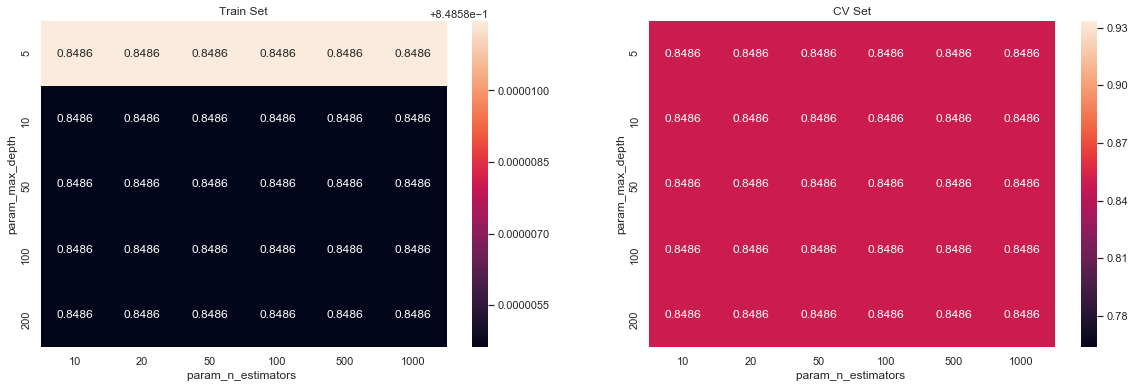

In [78]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

max_scores1 = pd.DataFrame(lgb_model.cv_results_).groupby(["param_max_depth","param_n_estimators "]).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [88]:
gsearch.best_params_


{'max_depth': 5, 'n_estimators ': 10}

In [92]:
best_parameters =[{'max_depth':[5], 'n_estimators': [10] }  ]

C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


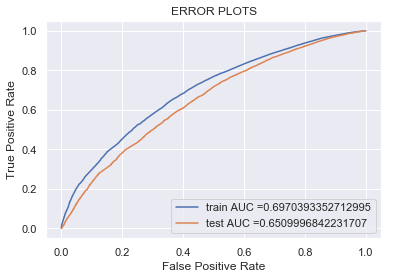

In [103]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


clf11 = GridSearchCV(lgb.LGBMClassifier(class_weight='balanced'),best_parameters)
clf11.fit(X_set1_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred1 = clf11.predict_proba(X_set1_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set1_test) [:,1]  


train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [104]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1   # make it global 
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
            
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.41 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.5


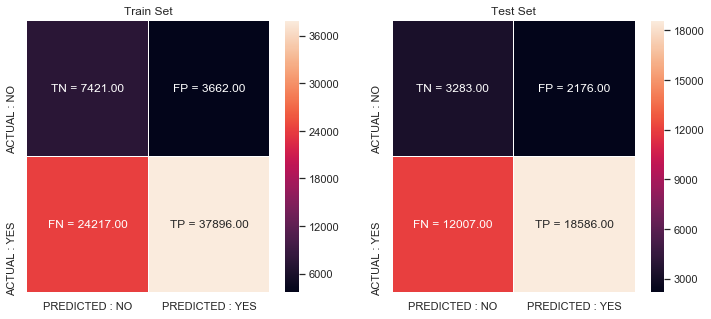

In [105]:
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# GBDT FOR SET2

In [106]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc



In [108]:
param_grid = {
    'max_depth': [5,10, 50, 100, 200],
    'n_estimators ':[10, 20, 50, 100, 500, 1000]
    }

lgb_estimator_2 = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.01, metric='auc')

gsearch_2 = GridSearchCV(estimator=lgb_estimator_2, param_grid=param_grid, cv=3,return_train_score=True)
lgb_model_2 = gsearch_2.fit(X_set2_train, y_train)

print(lgb_model_2.best_params_, lgb_model_2.best_score_)

{'max_depth': 5, 'n_estimators ': 10} 0.8485846221104978


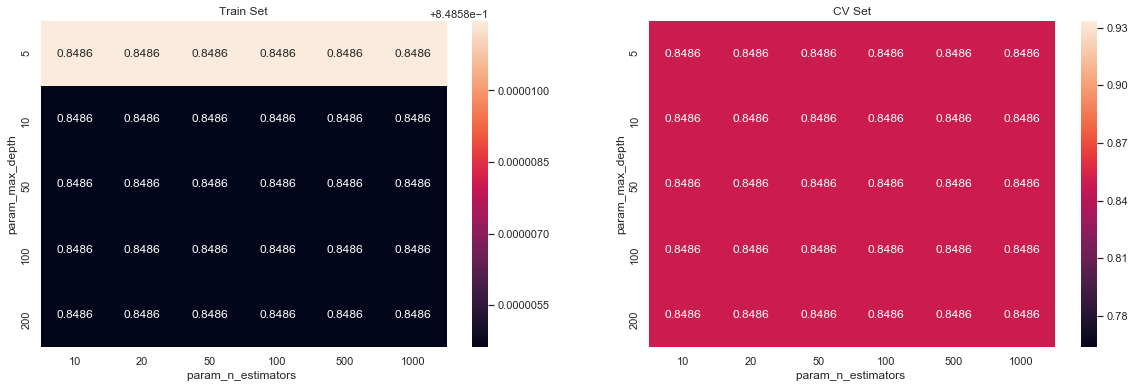

In [109]:
import seaborn as sns; sns.set()

max_scores2 = pd.DataFrame(lgb_model.cv_results_).groupby(["param_max_depth","param_n_estimators "]).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [110]:
gsearch_2.best_params_

{'max_depth': 5, 'n_estimators ': 10}

In [111]:
best_parameters_2 =[{'n_estimators': [10],  'max_depth':[5]  }  ]

C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


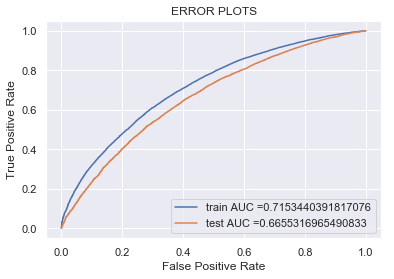

In [112]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc



clf2 = GridSearchCV(lgb.LGBMClassifier(class_weight='balanced'),best_parameters_2)
clf2.fit(X_set2_train, y_train)


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function


y_train_pred2 = clf2.predict_proba(X_set2_train) [:,1]   
y_test_pred2 =  clf2.predict_proba(X_set2_test) [:,1]  


train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.41 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.37 for threshold 0.5


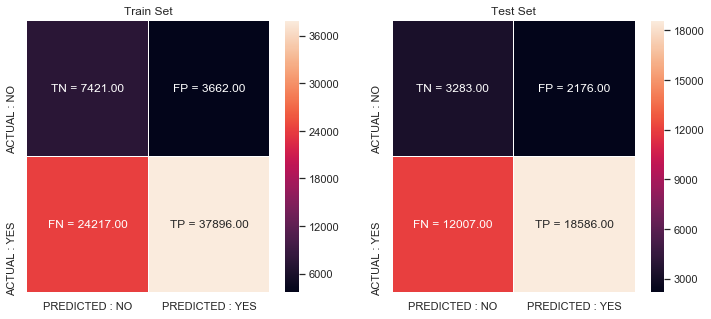

In [113]:
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [115]:
#how to use pretty table http://zetcode.com/python/prettytable/ 
from prettytable import PrettyTable 
tb = PrettyTable()
tb.field_names= (" Vectorizer  ", "  Model  ", "  Max depth  ","  n-estimators  ","  AUC  ")
tb.add_row(["   Tf - Idf","lightgbm"  , 5,10 ,65]) 
tb.add_row(["  TfIdf-W2V", "lightgbm" , 5,10 , 66]) 

print(tb.get_string(titles = "GBDT- Observations")) #print(tb)

+---------------+-----------+---------------+------------------+---------+
|  Vectorizer   |   Model   |   Max depth   |   n-estimators   |   AUC   |
+---------------+-----------+---------------+------------------+---------+
|     Tf - Idf  |  lightgbm |       5       |        10        |    65   |
|    TfIdf-W2V  |  lightgbm |       5       |        10        |    66   |
+---------------+-----------+---------------+------------------+---------+
